In [126]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import json
import os
import random
import shutil
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from PIL import Image
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [127]:
with open("/home/tuandinh/Desktop/Computer Vision ITMO/Week2/model_10k.json") as f:
    config = json.load(f)
config = json.dumps(config)
loaded_model = tf.keras.models.model_from_json(config)
loaded_model.load_weights("/home/tuandinh/Desktop/Computer Vision ITMO/Week2/Model_10k_images.h5")
print("Loaded model from disk")

Loaded model from disk


In [128]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [130]:
TRAIN_DIR = "/home/tuandinh/Desktop/Computer Vision ITMO/Week2/train"
TEST_DIR = "/home/tuandinh/Desktop/Computer Vision ITMO/Week2/test_dir"
if os.path.exists(TEST_DIR) == False:
    os.makedirs(TEST_DIR)

In [131]:
# Chọn ngẫu nhiên 10 tệp ảnh mèo từ khoảng [10450, 10550)
cat_files = [f for f in os.listdir(TRAIN_DIR) if f.startswith('cat.') and
             int(f.split('.')[1]) >= 10450 and int(f.split('.')[1]) < 10550]

# Chọn ngẫu nhiên 100 tệp ảnh chó từ khoảng [10450, 10550)
dog_files = [f for f in os.listdir(TRAIN_DIR) if f.startswith('dog.') and
             int(f.split('.')[1]) >= 10450 and int(f.split('.')[1]) < 10550]

In [132]:
#create folder for dog and cat
if os.path.exists(os.path.join(TEST_DIR,'cat')) == False:
    os.makedirs(os.path.join(TEST_DIR,'cat'))
if os.path.exists(os.path.join(TEST_DIR,'dog')) == False:
    os.makedirs(os.path.join(TEST_DIR,'dog'))
CAT = os.path.join(TEST_DIR,'cat')
DOG = os.path.join(TEST_DIR,'dog')
for file in cat_files:
    shutil.copy(os.path.join(TRAIN_DIR, file), os.path.join(CAT,file))

for file in dog_files:
    shutil.copy(os.path.join(TRAIN_DIR, file), os.path.join(DOG,file))


In [133]:
img_width, img_height = 150, 150
epochs = 30 # количество эпох (итераций)
batch_size = 16 

In [134]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(img_width, img_height),
    batch_size=200,
    class_mode='binary',
    shuffle=False) #Сохраняет последовательноcть файлов из папки

Found 200 images belonging to 2 classes.


In [135]:
imgs,labels=test_generator.next()
array_imgs=np.transpose(np.asarray([tf.keras.utils.img_to_array(img) for img in imgs]),(0,2,1,3))
predictions=loaded_model.predict(imgs)
print("Predictions:")
print([x for x in predictions[:5]]) # выводим первые 3 предсказания
rounded_pred=np.asarray([np.round(i) for i in predictions]) #  округляем
print([np.round(x) for x in predictions[:5]])

7/7 [==============================] - 1s 143ms/step
Predictions:
[array([0.2842053], dtype=float32), array([0.03384573], dtype=float32), array([0.04696162], dtype=float32), array([0.4514355], dtype=float32), array([0.18981262], dtype=float32)]
[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32)]


In [136]:
y_true = labels
y_pred = rounded_pred

In [137]:
precision_score(y_true, y_pred, average='macro')

0.8636363636363636

In [138]:
recall_score(y_true, y_pred, average='macro')

0.8600000000000001

In [139]:
f1_score(y_true, y_pred, average='macro')

0.8596491228070176

In [140]:
accuracy_score(y_true, y_pred)

0.86

In [141]:
# Compute evaluation metrics
report = classification_report(labels, y_pred)

# Print evaluation metrics
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       100
         1.0       0.90      0.81      0.85       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [142]:
# cat.10483.jpg and dog.10483.jpg
NEW_TEST_DIR = "/home/tuandinh/Desktop/Computer Vision ITMO/Week2/test"
CAT_PATH_1 = os.path.join(NEW_TEST_DIR, 'cat')
DOG_PATH_1 = os.path.join(NEW_TEST_DIR,'dog')

if os.path.exists(NEW_TEST_DIR) == False:
    os.makedirs(NEW_TEST_DIR)
if os.path.exists(CAT_PATH_1) == False:
    os.makedirs(CAT_PATH_1)
if os.path.exists(DOG_PATH_1) == False:
    os.makedirs(DOG_PATH_1)
# Copy images to test_dir
cat_file = [f for f in os.listdir(TRAIN_DIR) if f.startswith('cat.') and
             int(f.split('.')[1]) == 10483]
dog_file = [f for f in os.listdir(TRAIN_DIR) if f.startswith('dog.') and
            int(f.split('.')[1]) == 10483]

print(cat_file)
print(dog_file)

['cat.10483.jpg']
['dog.10483.jpg']


In [143]:
for file in cat_file:
    shutil.copy(os.path.join(TRAIN_DIR, file), os.path.join(CAT_PATH_1,file))

for file in dog_file:
    shutil.copy(os.path.join(TRAIN_DIR, file), os.path.join(DOG_PATH_1,file))

In [144]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    NEW_TEST_DIR,
    target_size=(img_width, img_height),
    batch_size=2,
    class_mode='binary',
    shuffle=False) #Сохраняет последовательноcть файлов из папки

Found 2 images belonging to 2 classes.


In [145]:
imgs,labels=test_generator.next()
array_imgs=np.transpose(np.asarray([tf.keras.utils.img_to_array(img) for img in imgs]),(0,2,1,3))
predictions=loaded_model.predict(imgs)
print("Predictions:")
print([x for x in predictions[:5]]) # выводим первые 3 предсказания
rounded_pred=np.asarray([np.round(i) for i in predictions]) #  округляем
print([np.round(x) for x in predictions[:5]])

1/1 [==============================] - 0s 59ms/step
Predictions:
[array([0.2597945], dtype=float32), array([0.70030475], dtype=float32)]
[array([0.], dtype=float32), array([1.], dtype=float32)]


+ prob_cat = 1 - 0.025979 = ...
+ prob_dog = 0.7
+ Luu y can lam tron theo dung nhu de bai yeu cau, neu khong ket qua se sai

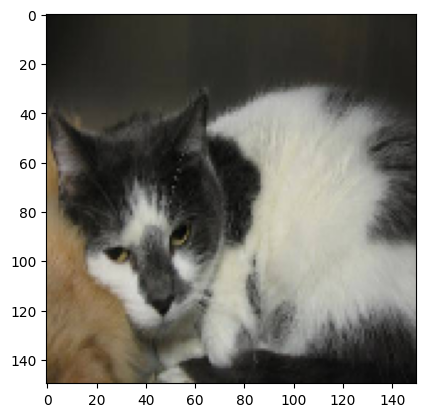

In [146]:
plt.imshow(imgs[0])

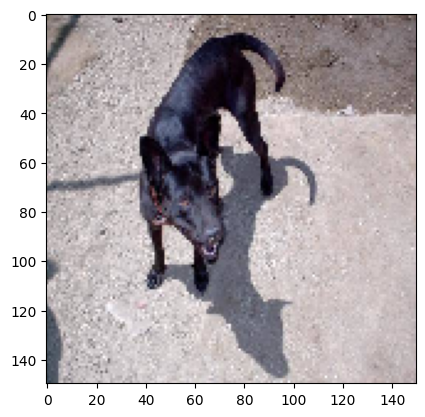

In [147]:
plt.imshow(imgs[1])